# (Chicago Crime Data Analysis and Visualization)
## by (Amr Morsy)

## Preliminary Wrangling

> **Data Set**
> This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2004 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

>Primary dataset location: https://www.kaggle.com/currie32/crimes-in-chicago


In [339]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [340]:
rangeStarts = [(2005, 2), (2008, 3), (2012, 5)]
crimes = []

for i, rng in enumerate(rangeStarts):
  file =   'Chicago_Crimes_%d_to_%d.csv' % (rng[0], rng[0] + rng[1])
  crimes.append(pd.read_csv(file, error_bad_lines = False))

# Comment: Concatenate the files in one dataframe
allCrimes = pd.concat(crimes, ignore_index = True, axis = 0)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [341]:
allCrimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


## **Preprocessing Crime Data**

In [342]:
allCrimes.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [343]:
#Convert the data format
allCrimes.Date = pd.to_datetime(allCrimes.Date, format ='%m/%d/%Y %I:%M:%S %p')
allCrimes.index = pd.DatetimeIndex(allCrimes.Date)

In [344]:
#Select Most Common Crime Locations and Descriptions
selectedCategories = 25
print(allCrimes['Location Description'].value_counts())

# Find most common
mostFrequentLocations  = list(allCrimes['Location Description'].value_counts()[:selectedCategories].index)
mostFrequentDescription= list(allCrimes['Description'].value_counts()[:selectedCategories].index)

# Replace other locations with 'OTHER'
allCrimes.loc[~allCrimes['Location Description'].isin(mostFrequentLocations) , allCrimes.columns=='Location Description'] = 'OTHER'
allCrimes.loc[~allCrimes['Description'].isin(mostFrequentLocations) , allCrimes.columns=='Description'] = 'OTHER'
print(allCrimes['Location Description'].value_counts())

STREET           1517724
RESIDENCE         991977
SIDEWALK          674793
APARTMENT         668298
OTHER             216154
                  ...   
POOLROOM               1
TRAILER                1
WOODED AREA            1
CTA "L" TRAIN          1
ELEVATOR               1
Name: Location Description, Length: 161, dtype: int64
STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              665578
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
RESIDENCE PORCH/HALLWAY            103649
SMALL RETAIL STORE                 103462
RESTAURANT                          89154
DEPARTMENT STORE                    72763
RESIDENTIAL YARD (FRONT/BACK)       72504
GROCERY FOOD STORE                  69721

In [345]:
#Convert Column Types into Categorical
allCrimes['Primary Type']         = pd.Categorical(allCrimes['Primary Type'])
allCrimes['Location Description'] = pd.Categorical(allCrimes['Location Description'])
allCrimes['Description']          = pd.Categorical(allCrimes['Description'])
#change bool to string to plot it later 
allCrimes['Arrest']  =allCrimes['Arrest'].astype(str)
allCrimes['Domestic']=allCrimes['Domestic'].astype(str)
                   

In [346]:
#Remove Unnecessary Columns
allCrimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On', 'FBI Code', 'Beat',
                'Ward'], inplace = True, axis = 1)

In [347]:
allCrimes.isnull().sum()

ID                          0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
District                   89
Community Area           1844
X Coordinate            74882
Y Coordinate            74882
Year                        0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [348]:
allCrimes.dropna(inplace=True)
allCrimes.shape

(5941133, 16)

In [349]:
allCrimes.duplicated().sum()

1665855

In [350]:
allCrimes.drop_duplicates(inplace=True)
allCrimes.shape

(4275278, 16)

# What is the structure of your dataset?
it has more than 400,000 records each has th following attributes
![bFCl7In[1].png](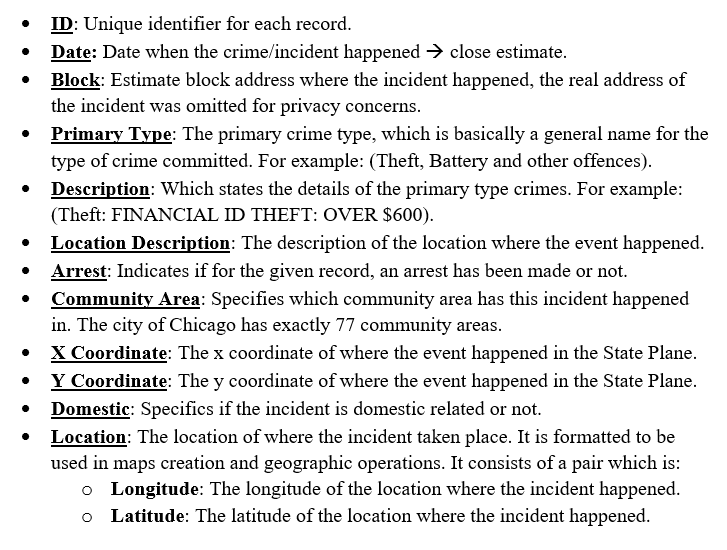)

### What is/are the main feature(s) of interest in your dataset?

> the crime Rate per year, what is the most Crime type, the number of arrested in each crime

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are alot Features in this Data Set, I will select year, Primarytype and Arrest

## Univariate Exploration


#### Insight 1 : " What is the year that has most of crimes ?"

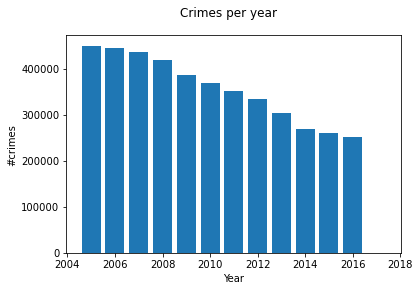

In [351]:
#(allCrimes.groupby(allCrimes['Year'])['ID'].count()).plot(kind = 'bar');
#allCrimes.groupby(allCrimes['Year'])['ID'].count()
x=allCrimes.groupby(allCrimes['Year'])['Year'].unique()
y=allCrimes.groupby(allCrimes['Year'])['ID'].count()

plt.bar(x, y)
plt.suptitle('Crimes per year')
# Labeling the axes
plt.xlabel('Year')
plt.ylabel('#crimes')

# Dsiplay the plot
plt.show()

In [352]:
#remove year 2017 it has small number of records
allCrimes.drop(allCrimes[allCrimes['Year']==2017].index, axis = 0, inplace=True)

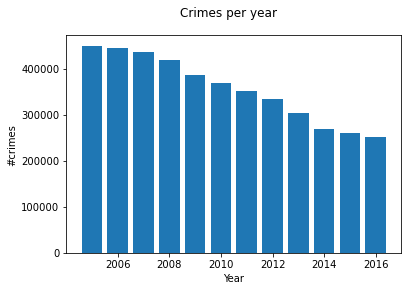

In [353]:
x=allCrimes.groupby(allCrimes['Year'])['Year'].unique()
y=allCrimes.groupby(allCrimes['Year'])['ID'].count()

plt.bar(x, y)
plt.suptitle('Crimes per year')
# Labeling the axes
plt.xlabel('Year')
plt.ylabel('#crimes')

# Dsiplay the plot
plt.show()

from the above chart its clear that number of crimes decreases over year which means that polic is going in the rightway. Also we should notice that 2005 is the most year that has crimes 

#### Insight 2 : " What is number of crimes happened in each crime catageory ?"

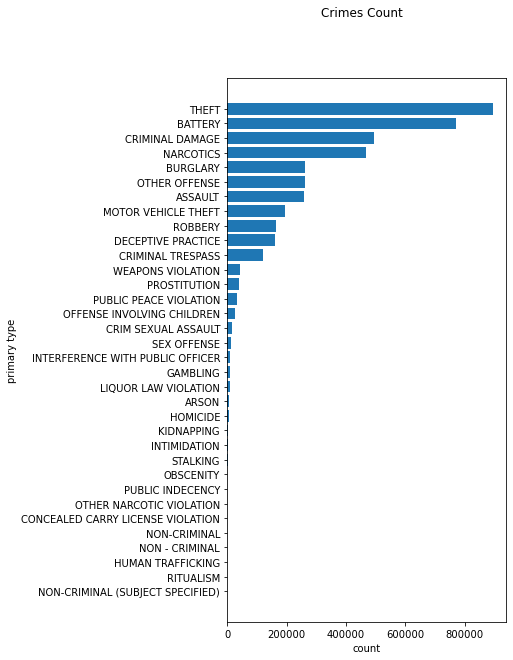

In [354]:
val=(allCrimes['Primary Type']).value_counts (ascending=True)
x=val.index
y=val.values
plt.subplots(figsize=(5,10))
plt.barh(x, y)
#plt.invert_yaxis()
# Labeling the axes
plt.suptitle('Crimes Count')
plt.xlabel('count')
plt.ylabel('primary type')

# Dsiplay the plot
plt.show()

From the above graph, Theft and Battery are the most crime that happen in chicago

#### Insight 3 : " What is number of Arrested ?"

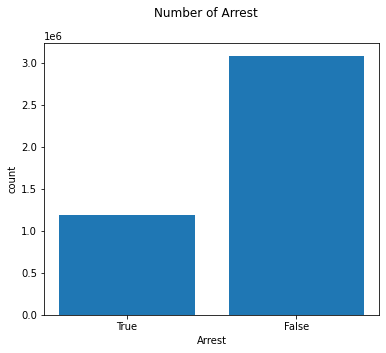

In [355]:
val=(allCrimes['Arrest']).value_counts (ascending=True)
x=val.index
y=val.values
plt.subplots(figsize=(6,5))
plt.bar(x, y)
#plt.invert_yaxis()
# Labeling the axes
plt.suptitle('Number of Arrest')
plt.ylabel('count')
plt.xlabel('Arrest')

# Dsiplay the plot
plt.show()

more than half of the crimiminals are not arrested !

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No trasnformation were needed as the variables are categorical vs quantitive and they are clear.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 2017 had very few records which requires to be removed 

## Bivariate Exploration



#### Insight 4 : "number of arrestted in each crime type ?"

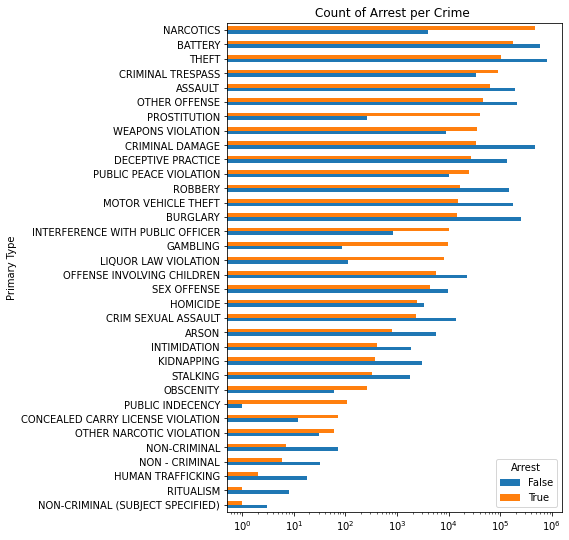

In [356]:
val=allCrimes.groupby(['Primary Type','Arrest']).size()
val=val.reset_index(name='count')
val=val.pivot(index = 'Primary Type', columns = 'Arrest', values = 'count')
#plt.subplots(figsize=(6,9))
val.sort_values(by='True').plot(kind='barh',figsize=(6,9),title='Count of Arrest per Crime ',sort_columns =True,logx =True)
#sb.countplot(data = val, x = val.index, hue = 'Arrest')


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In most crime types the number of not arrested is more than the number of arrestted which confirms the number of arrest chart


## Multivariate Exploration



#### Insight 5 : "What is the crime Rate per year ?"

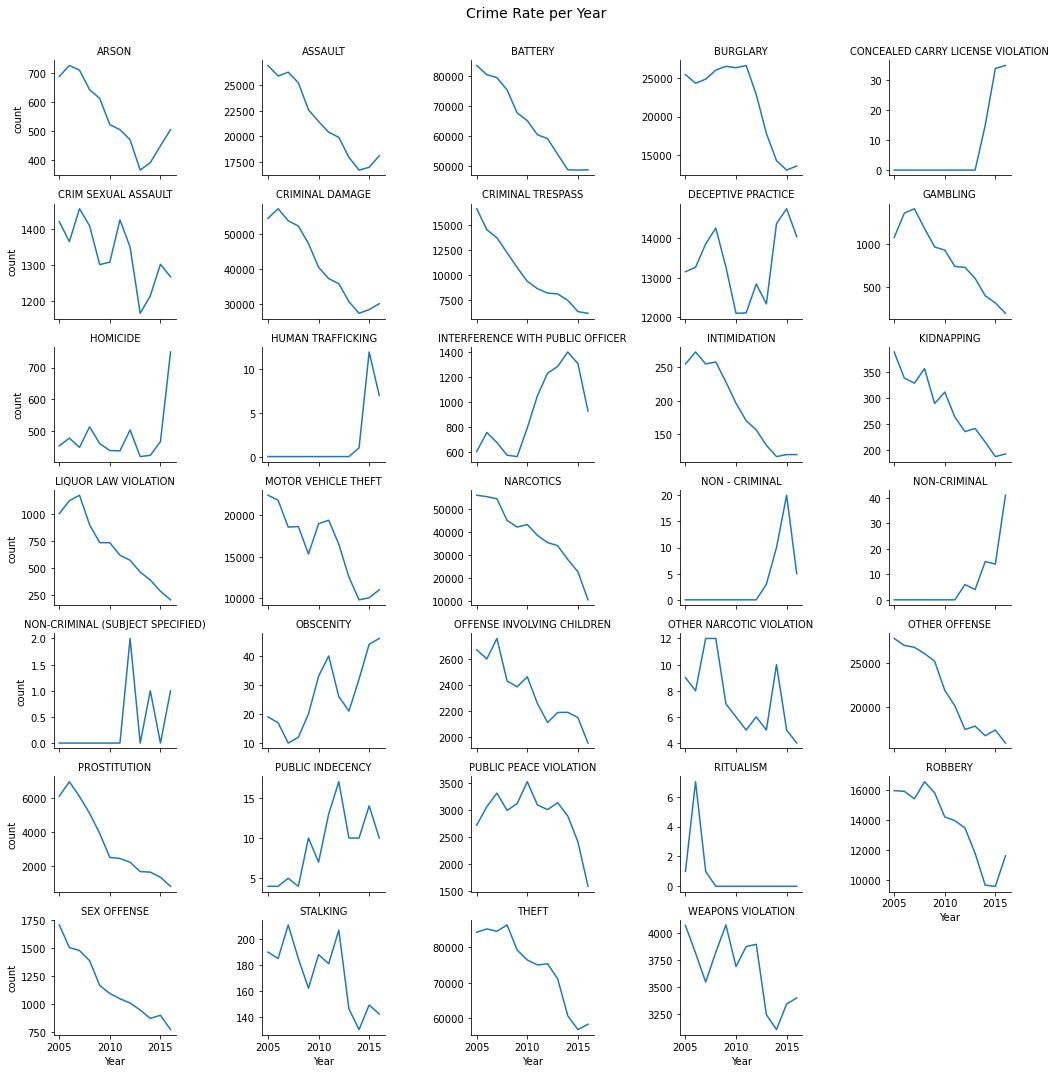

In [393]:
crimes_counts = allCrimes.groupby(['Primary Type','Year']).size()
crimes_counts = crimes_counts.reset_index(name = 'count')

#fig, ax = plt.subplots(figsize=(10*10))
g = sb.FacetGrid(data = crimes_counts, col = 'Primary Type',col_wrap = 5,sharey = False)

g.map(sb.lineplot , "Year","count");

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.suptitle("Crime Rate per Year", size=14)
g.fig.subplots_adjust(top=0.93)
g.fig.set_size_inches(15,15)

 some of the crimes decreased throw time which mean the police is going in the right direction such as Battery, Sex Offense, Prosttituion, public peace violation,offense, liquor law violation and Gambling which confirms that they arressted alot in thease categories by the charts in bivariate  

 But in some other crime there was a decreasing but since arround 2015 the crime started to increase such as Robbery,motor vechile theft, Arson, Assual.
 
 some of them had an increases and decreases which could be due to some changes in chicago  